In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Reading in data
data = pd.read_csv("data_icu.csv")
#data = pd.read_csv("/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 527/surgical_critical_event_prediction/data_icu.csv")

In [26]:
# this contains data only on people who spent at least one day in the ICU
# icu_length = 0 means one day in the ICU, icu_length = 1 means two or more days in the ICU - RENAME as "inpatient"
data.head()

,subjectid,Age,Ht,Wt,Sex,OP_time,Open,Robotic,Videoscopic,icu_days,death_inhosp,age_group,icu_length,Mahalanobis
0,5077,18.0,175.1,59.2,0,292.55,1,0,0,3,0,child,1,2.082258
1,10,0.7,64.1,8.9,1,475.00,1,0,0,38,0,child,1,2.051887
2,5985,0.6,42.0,5.6,1,435.00,1,0,0,15,0,child,1,2.553821
3,10,0.8,64.1,8.9,1,115.00,1,0,0,38,0,child,1,1.676772
4,4603,18.0,185.0,62.6,0,210.00,1,0,0,1,0,child,0,1.775898


# Multiple Linear Regression

For this section, we will only consider people who did have ICU stays and will predict the number of days their stay lasted.

There are 913 training instances and 229 testing instances


(array([190.,  19.,  10.,   1.,   1.,   1.,   5.,   0.,   1.,   1.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

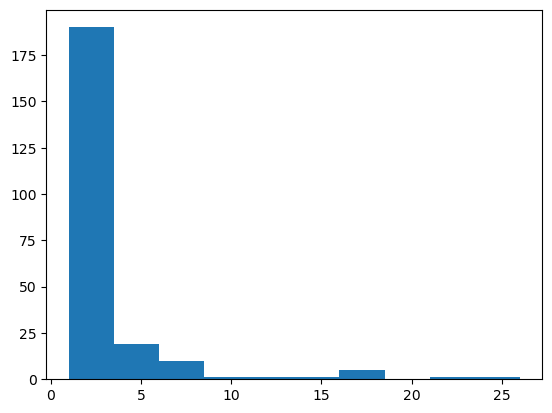

In [27]:
# select the relevant variables
X_ml = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_ml = data['icu_days']

# test/train split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=10)

print(f'There are {len(y_train_ml)} training instances and {len(y_test_ml)} testing instances')

# train the model and make predictions
model_ml = LinearRegression()
model_ml.fit(X_train_ml, y_train_ml)
y_prediction_ml = model_ml.predict(X_test_ml)

plt.figure()
plt.hist(y_test_ml)

The feature variables explain -20.33223988732167% of the variance in number of ICU days
The root mean squared error is 3.7915072996013865


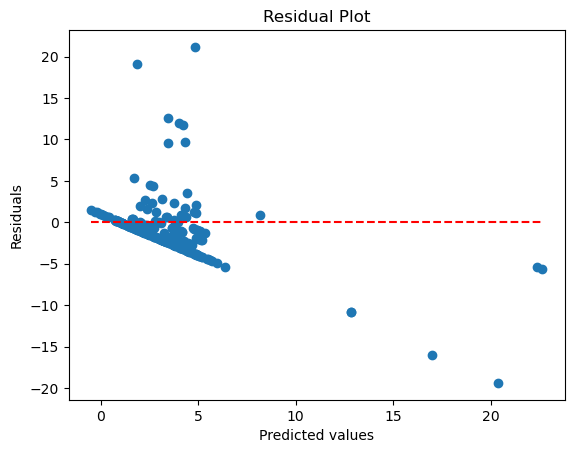

In [28]:
# Coefficient of Determination (R²):
# R² explains the proportion of variance in the target variable that is explained by the predictors.
r2_ml = r2_score(y_test_ml, y_prediction_ml)
print(f'The feature variables explain {100*r2_ml}% of the variance in number of ICU days')

rmse_ml = mean_squared_error(y_test_ml, y_prediction_ml, squared = False)
print(f'The root mean squared error is {rmse_ml}')

# plotting residuals
residuals_ml = y_test_ml - y_prediction_ml
plt.scatter(y_prediction_ml, residuals_ml)
plt.hlines(0, min(y_prediction_ml), max(y_prediction_ml), colors="r", linestyles="dashed")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Logistic Regression (ICU)

Predict whether or not someone will have long or short ICU stay.

In [29]:
X_lr_icu = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_lr_icu = data['icu_length']

X_train_lr_icu, X_test_lr_icu, y_train_lr_icu, y_test_lr_icu = train_test_split(X_lr_icu, y_lr_icu, test_size=0.2, random_state=42)
print(f'There are {len(y_train_lr_icu)} training instances and {len(y_test_lr_icu)} testing instances')

# train the model and make predictions
model_lr_icu = LogisticRegression(class_weight="balanced", solver='liblinear', random_state=42)
model_lr_icu.fit(X_train_lr_icu, y_train_lr_icu)
y_prediction_lr_icu = model_lr_icu.predict(X_test_lr_icu)

There are 913 training instances and 229 testing instances


In [30]:
accuracy_icu = accuracy_score(y_test_lr_icu, y_prediction_lr_icu)
print("Accuracy:", accuracy_icu)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_lr_icu, y_prediction_lr_icu))

# Classification Report
print("Classification Report:\n", classification_report(y_test_lr_icu, y_prediction_lr_icu))

Accuracy: 0.6986899563318777
Confusion Matrix:
 [[92 54]
 [15 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.63      0.73       146
           1       0.56      0.82      0.66        83

    accuracy                           0.70       229
   macro avg       0.71      0.72      0.70       229
weighted avg       0.75      0.70      0.70       229



# Logistic Regression (Mortality)

In [31]:
X_lr_mor = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_lr_mor = data['death_inhosp']

X_train_lr_mor, X_test_lr_mor, y_train_lr_mor, y_test_lr_mor = train_test_split(X_lr_mor, y_lr_mor, test_size=0.2, random_state=42)
print(f'There are {len(y_train_lr_mor)} training instances and {len(y_test_lr_mor)} testing instances')

# train the model and make predictions
model_lr_mor = LogisticRegression(solver='liblinear', random_state=42)
model_lr_mor.fit(X_train_lr_mor, y_train_lr_mor)
y_prediction_lr_mor = model_lr_mor.predict(X_test_lr_mor)

There are 913 training instances and 229 testing instances


In [32]:
accuracy_mor = accuracy_score(y_test_lr_mor, y_prediction_lr_mor)
print("Accuracy:", accuracy_mor)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_lr_mor, y_prediction_lr_mor))

# Classification Report
print("Classification Report:\n", classification_report(y_test_lr_mor, y_prediction_lr_mor))

Accuracy: 0.9563318777292577
Confusion Matrix:
 [[219   0]
 [ 10   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       219
           1       0.00      0.00      0.00        10

    accuracy                           0.96       229
   macro avg       0.48      0.50      0.49       229
weighted avg       0.91      0.96      0.93       229



/Users/dylanmack/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dylanmack/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dylanmack/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Again but weight towards minority class

model_lr_mor = LogisticRegression(class_weight="balanced", solver='liblinear', random_state=42)
model_lr_mor.fit(X_train_lr_mor, y_train_lr_mor)
y_prediction_lr_mor = model_lr_mor.predict(X_test_lr_mor)

accuracy_mor = accuracy_score(y_test_lr_mor, y_prediction_lr_mor)
print("Accuracy:", accuracy_mor)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_lr_mor, y_prediction_lr_mor))

# Classification Report
print("Classification Report:\n", classification_report(y_test_lr_mor, y_prediction_lr_mor))

Accuracy: 0.6986899563318777
Confusion Matrix:
 [[152  67]
 [  2   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.82       219
           1       0.11      0.80      0.19        10

    accuracy                           0.70       229
   macro avg       0.55      0.75      0.50       229
weighted avg       0.95      0.70      0.79       229

